In [172]:
%%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Markdown as md

Wall time: 3.99 ms


In [2]:
%%time
df = pd.read_csv("data/train.csv")

Wall time: 9.54 s


### Histogram of all numerical features

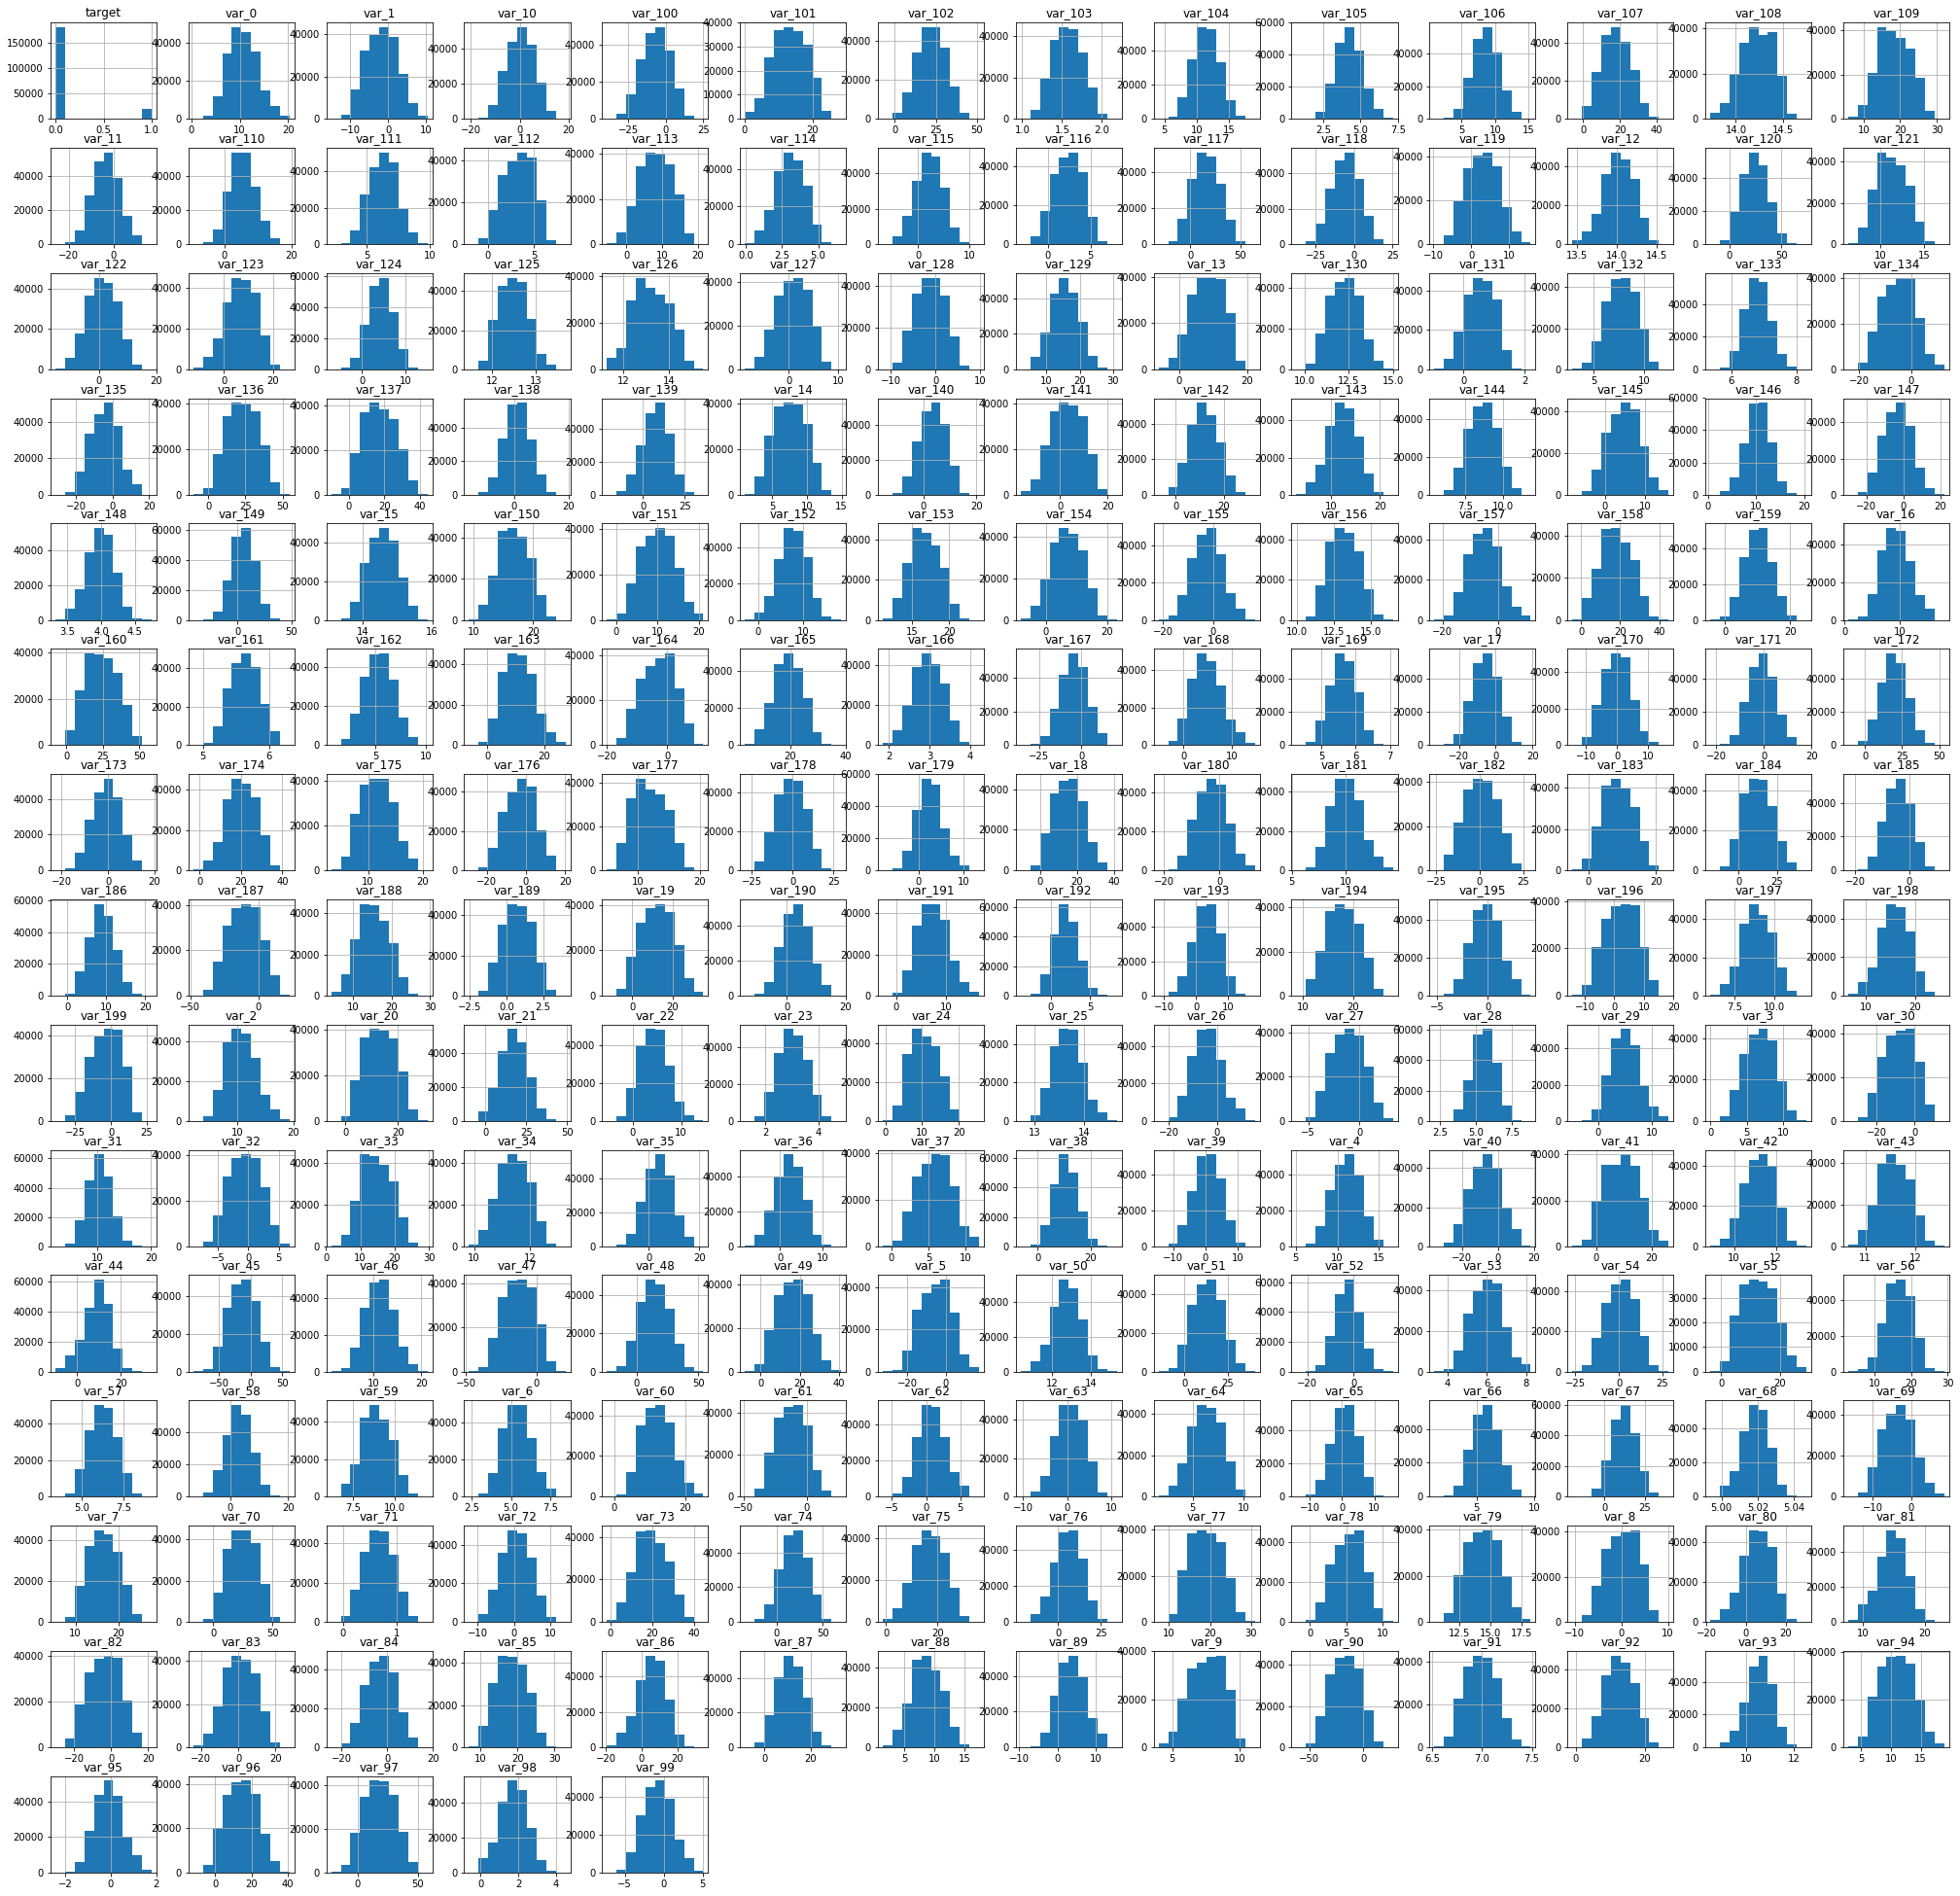

Wall time: 14.2 s


In [3]:
%%time

df.hist(figsize=(35,35))
plt.show()

### Data correlation

In [176]:
%%time

column_names = list(df.columns)
cols = column_names[2:]
corr_matrix = df[cols].corr(method="pearson").abs()
print(corr_matrix.shape)

# get only upper part of matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

max_pearson = np.round(np.nanmax(upper), 4)
print(max_pearson)
print(np.nanmin(upper))
print(np.nanmean(upper))

(200, 200)
0.0098
2.7039750586923505e-08
0.001986439482278233
Wall time: 23.4 s


All explaining variables (features) are almost uncorrelated - max Pearson < 0.01

In [177]:
md("All explaining variables (features) are almost uncorrelated - max Pearson is %f"%(max_pearson))

All explaining variables (features) are almost uncorrelated - max Pearson is 0.009800

### Visualize each feature's values with logarithmic value

In [5]:
%%time

column_names = df.columns

temp = np.empty((0,3), str)

for column in column_names:
    cnt = len(df[column].unique())
    pct = round(len(df[column].unique())/df.shape[0], 3)
    app = [[column, cnt, pct]]
    temp = np.concatenate((temp, app), axis=0)
    
column_df = pd.DataFrame(temp, columns=["name", "amount", "percentage"])

Wall time: 3.28 s


In [6]:
features_list = list(column_names[2:])

In [7]:
%%time
features_list_log = []

for feature in features_list:
    features_list_log.append(np.log(df[feature]))
    
len(features_list_log)

Wall time: 1.56 s


In [8]:
def visualize_features(list_of_features, list_of_logs):
    figsize_row = int(len(list_of_features) + (len(list_of_features)*0.2))
    figsize_col = int(len(list_of_features)/2)
    fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(figsize_row, figsize_col))

    for i in range(len(list_of_features)):#range(341, 348):
        #plt.subplot(int(len(list_of_features)/10), 10, i+1)
        plt.subplot(5, 10, i+1)
        #fig.tight_layout()
        plt.scatter(df[list_of_features[i]], list_of_logs[i])
        plt.title(list_of_features[i], fontdict={'fontsize': 36})
    plt.show()

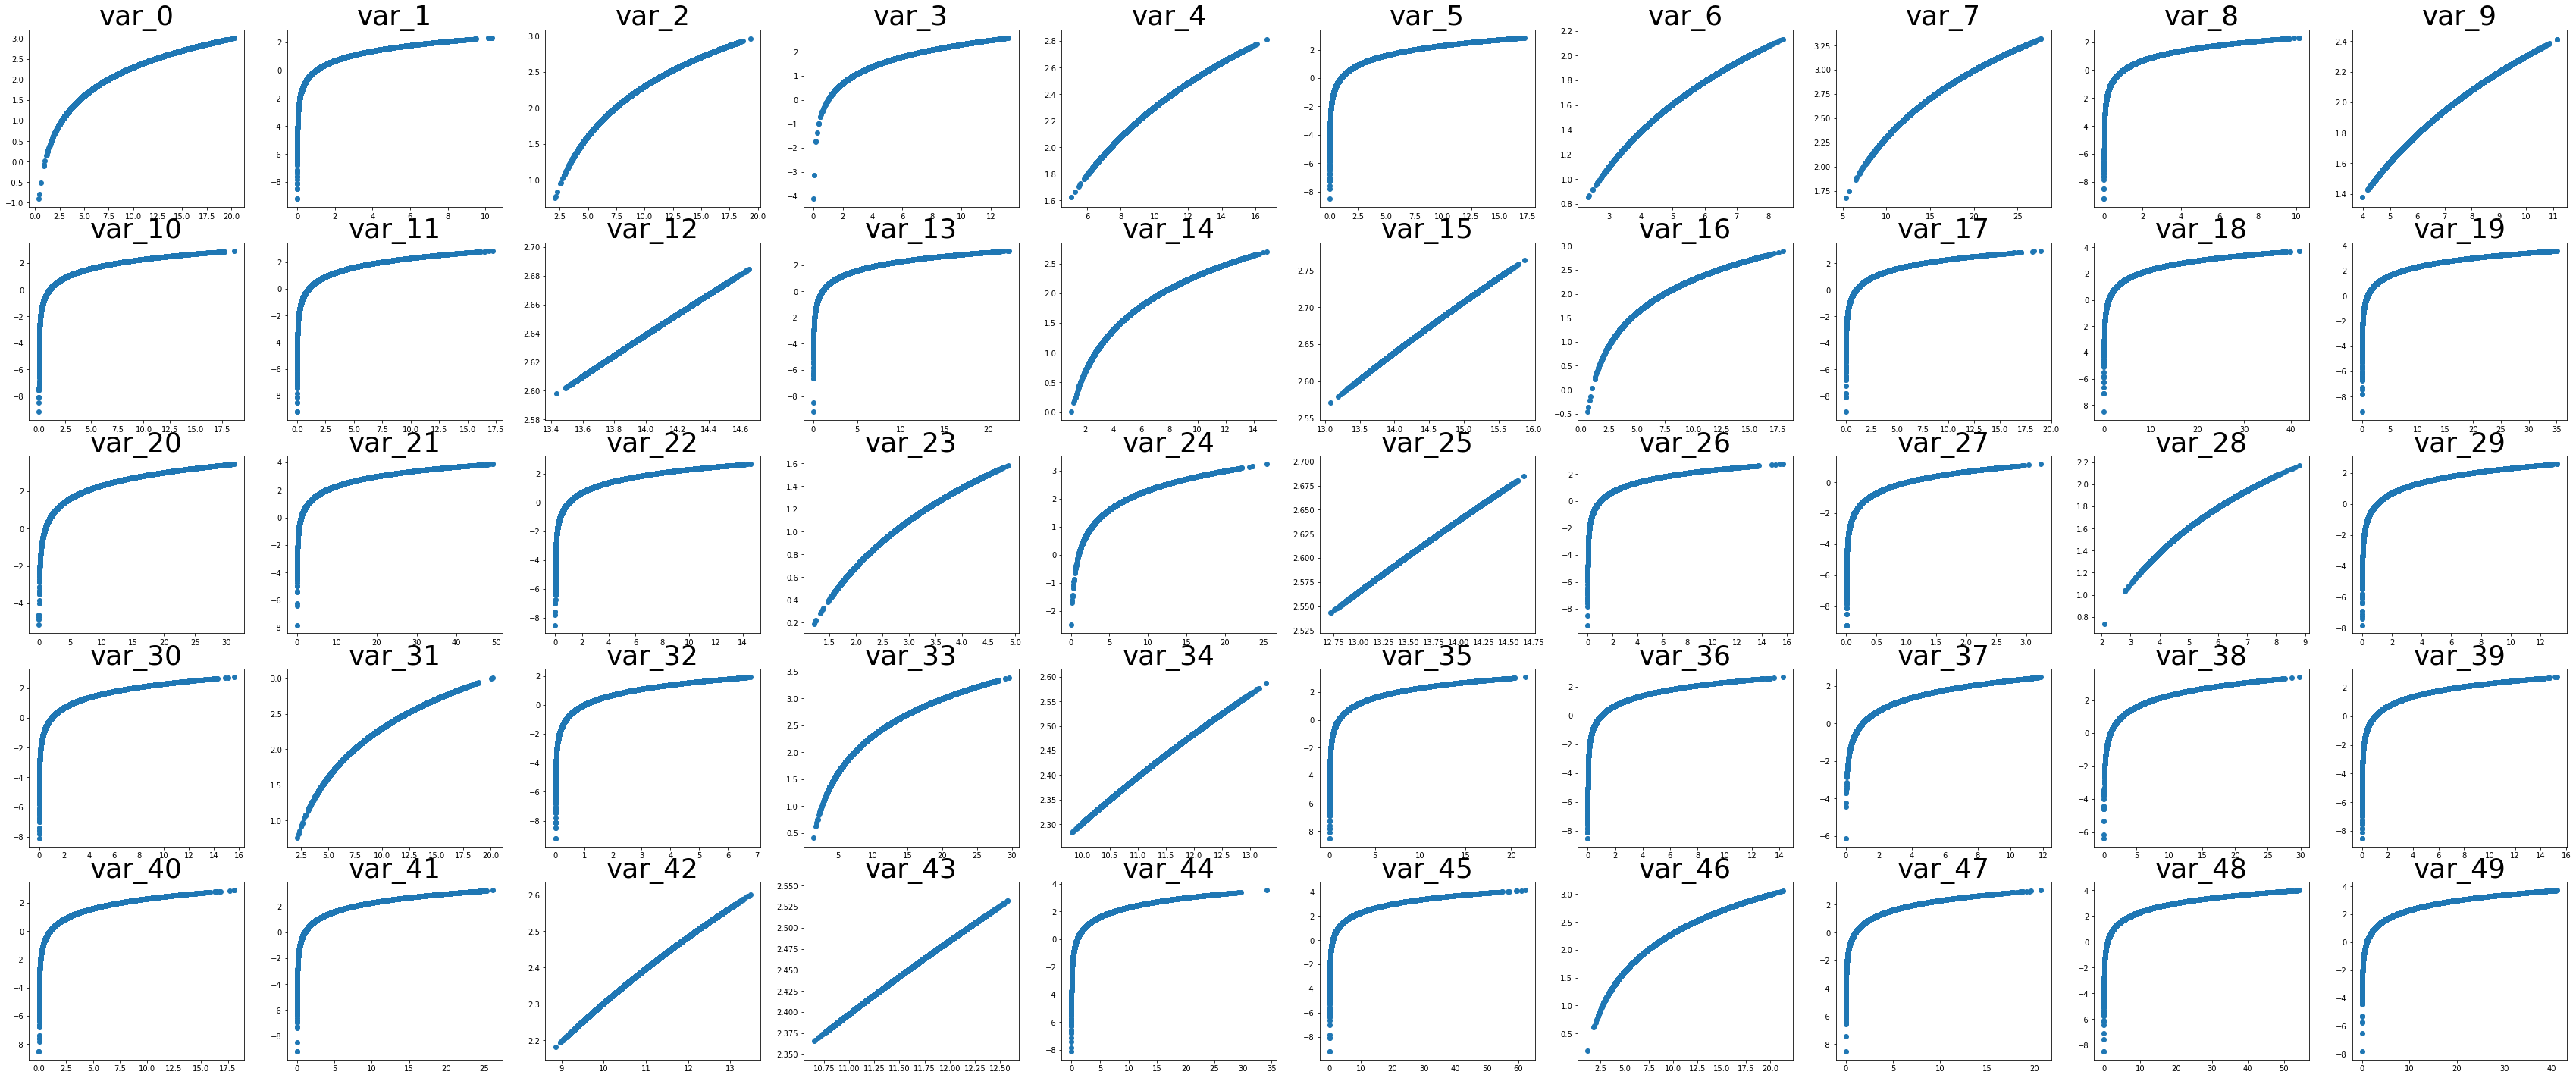

Wall time: 52 s


In [9]:
%%time
visualize_features(features_list[:50], features_list_log[:50])

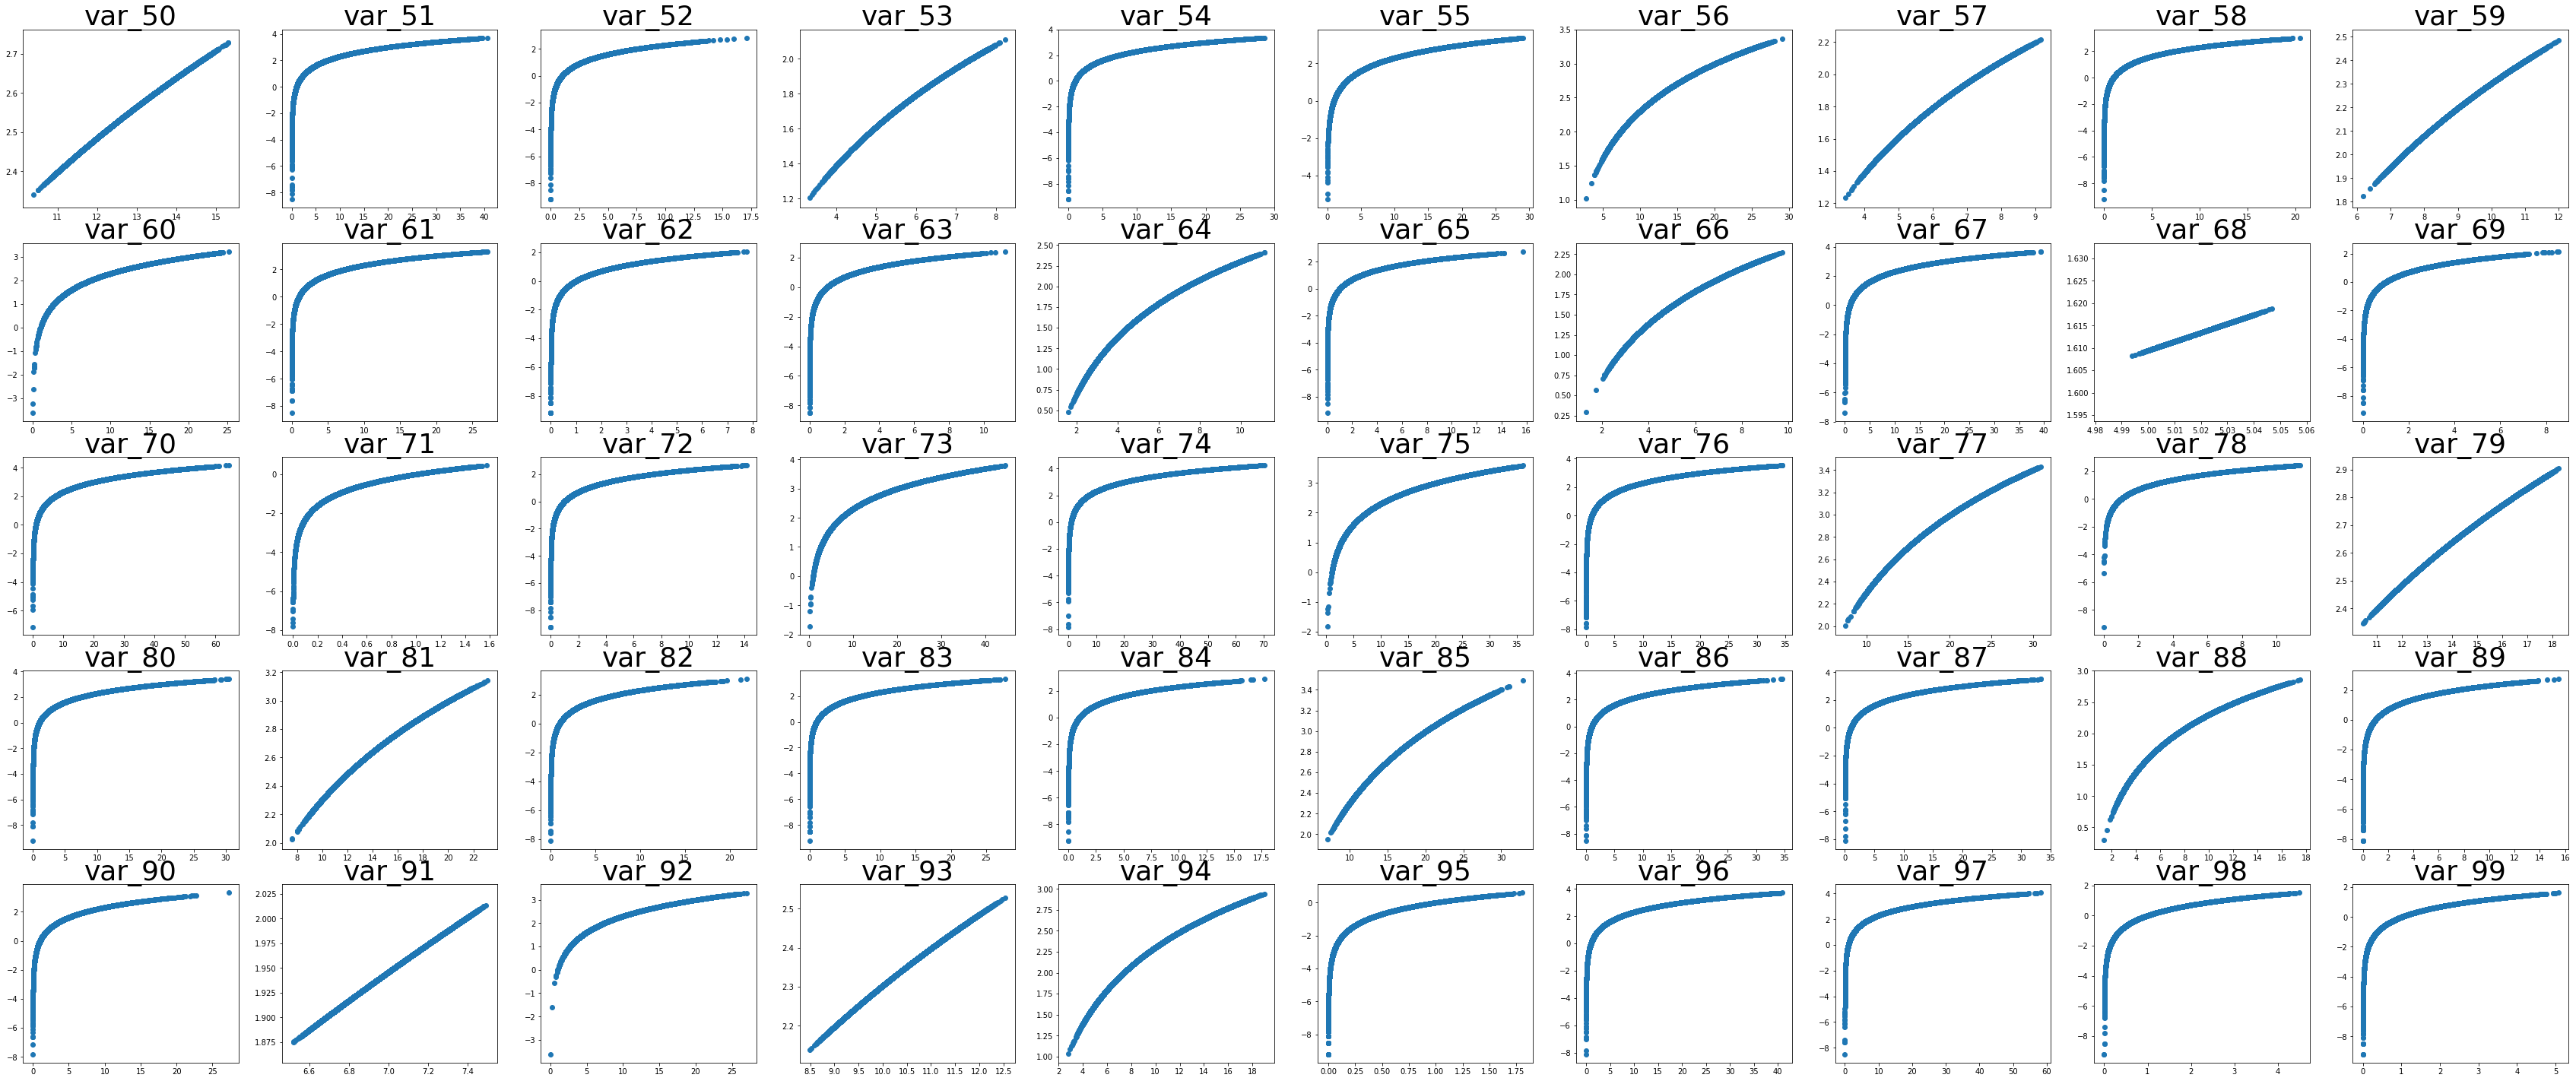

Wall time: 1min 1s


In [10]:
%%time
visualize_features(features_list[50:100], features_list_log[50:100])

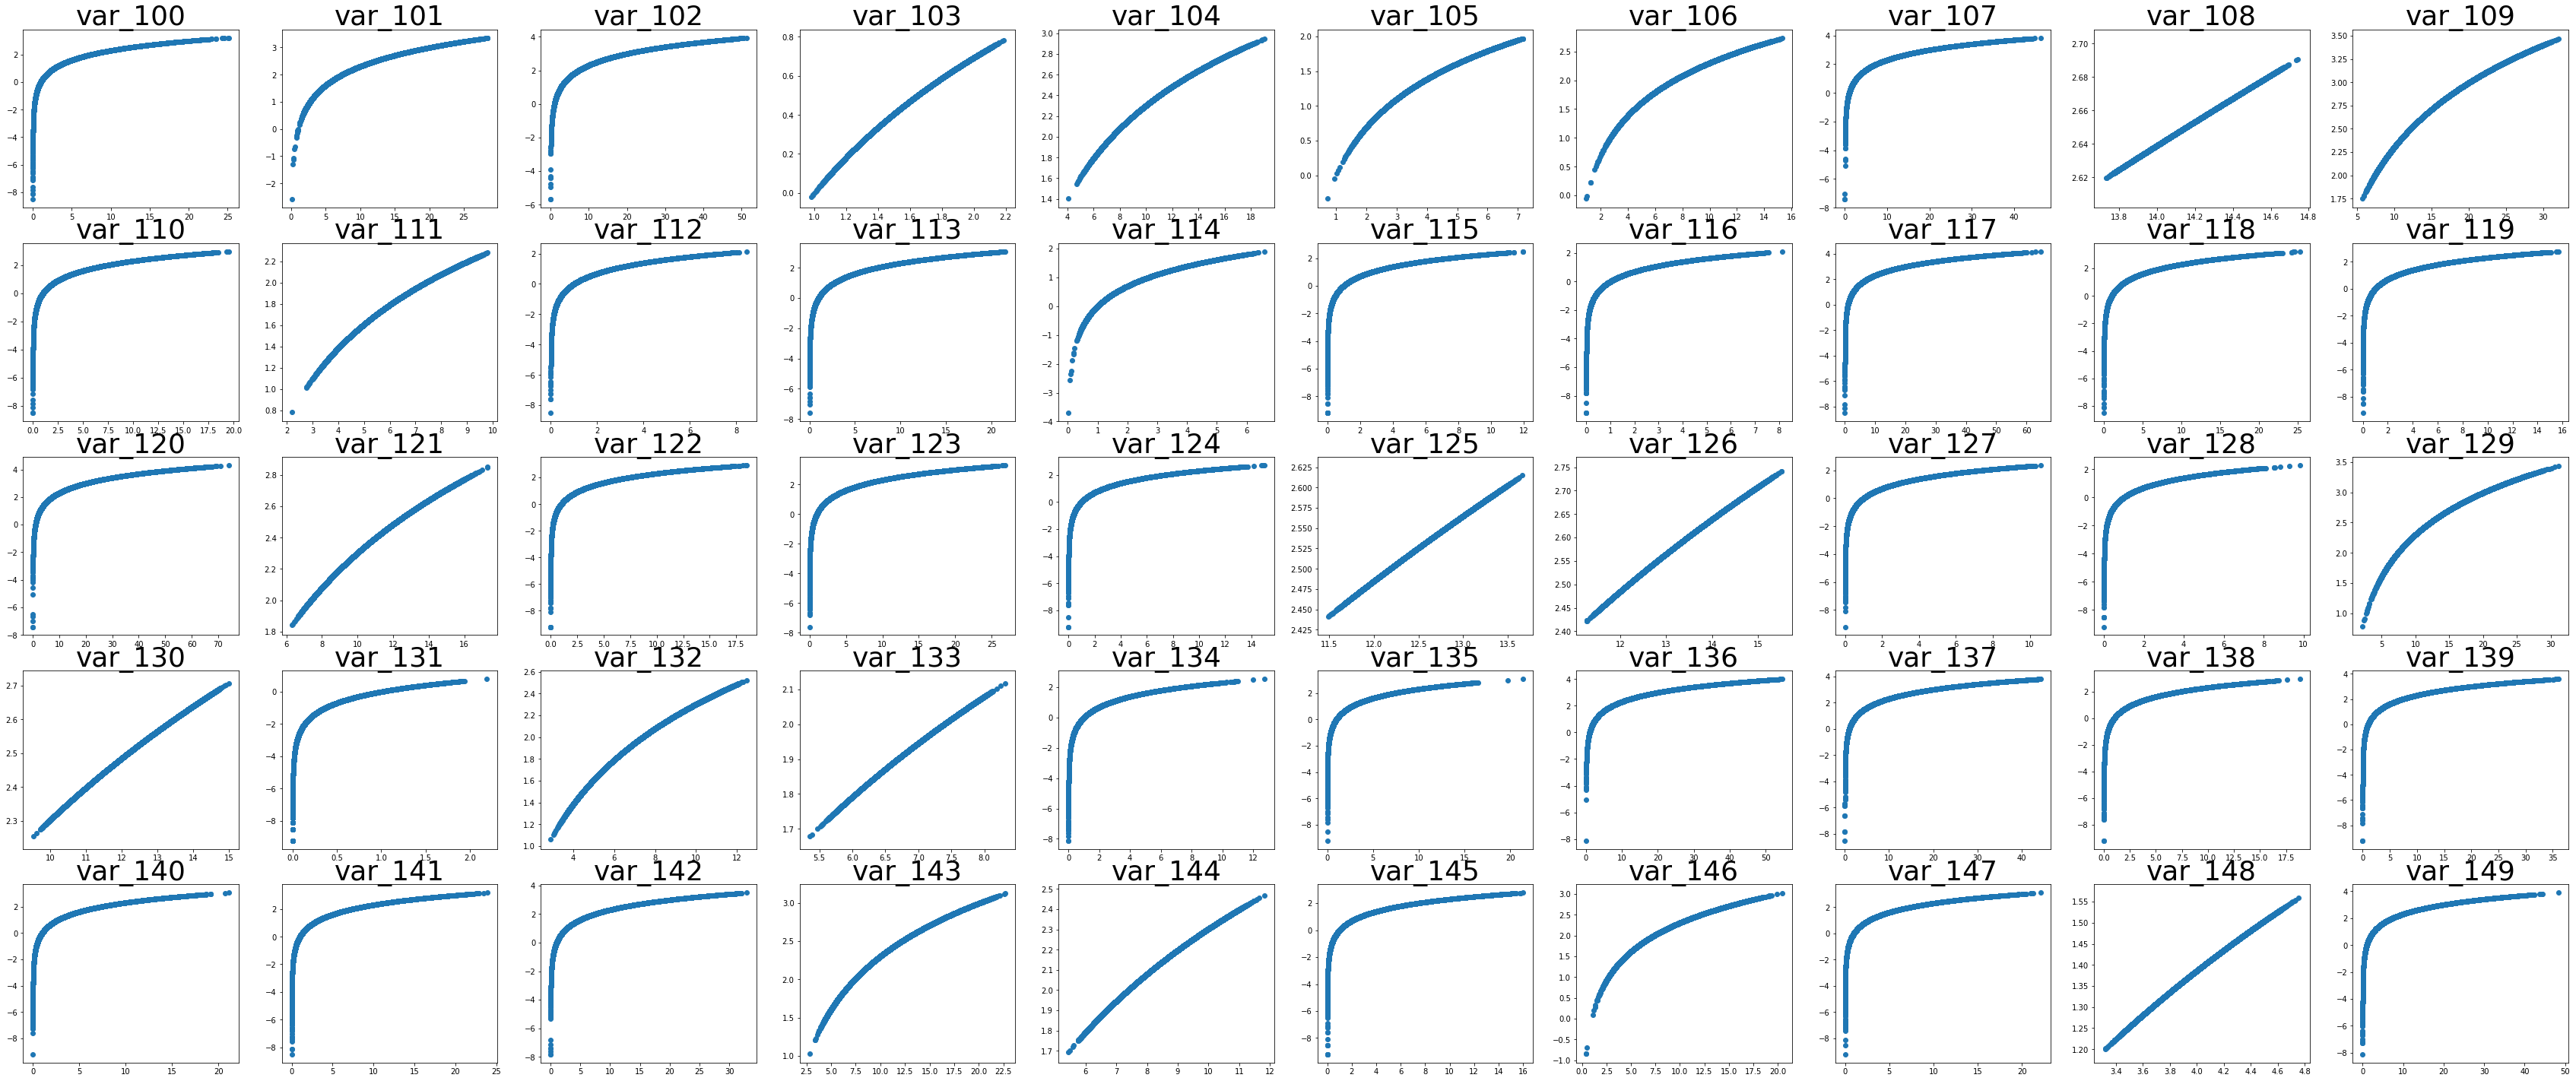

Wall time: 1min 22s


In [11]:
%%time
visualize_features(features_list[100:150], features_list_log[100:150])

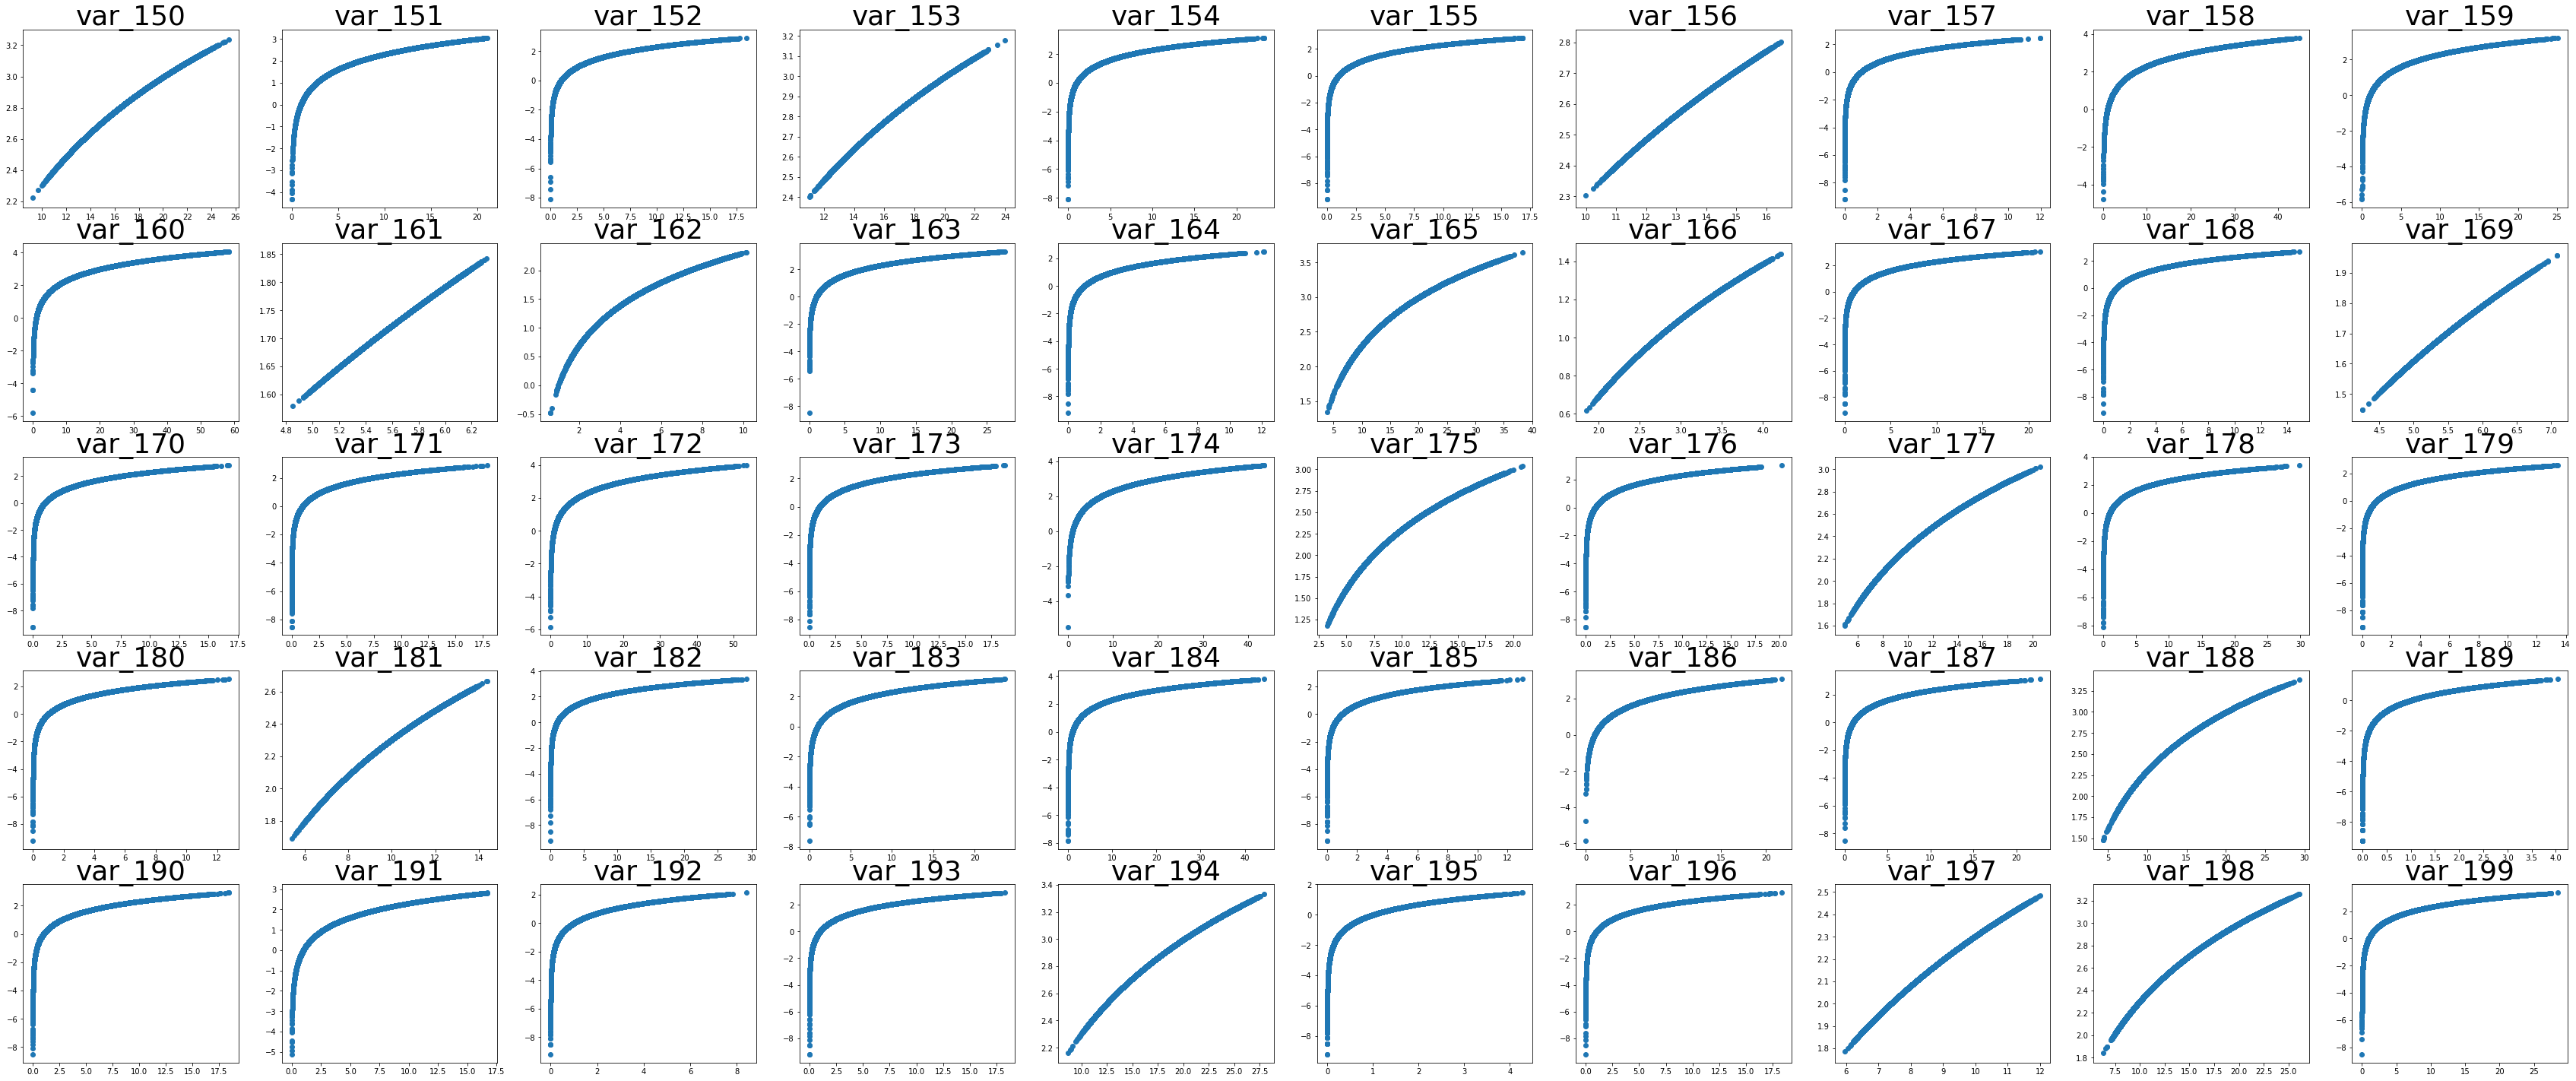

Wall time: 55 s


In [12]:
%%time
visualize_features(features_list[150:], features_list_log[150:])

In [212]:
a = df['var_91'][:5]
log_a = np.log(a)

print(a, log_a)

0    7.0834
1    7.1848
2    7.0194
3    6.9174
4    7.0197
Name: var_91, dtype: float64 0    1.957754
1    1.971968
2    1.948678
3    1.934040
4    1.948720
Name: var_91, dtype: float64


Density plots of features

In [13]:
def density_plot():
    
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(20, 10, figsize=(15, 23))
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    
    for i, feature in enumerate(df.columns[2:][:200]):
       
        target_0 = df[feature].loc[df['target'] == 0]
        target_1 = df[feature].loc[df['target'] == 1]
        
        plt.subplot(20, 10, i+1)
        sns.kdeplot(target_0, bw=0.5, label='0')

        plt.subplot(20, 10, i+1)
        plt.title(feature)
        plt.yticks([])
        plt.xticks([])
        sns.kdeplot(target_1, bw=0.5, label='1')
    plt.show()

<Figure size 432x288 with 0 Axes>

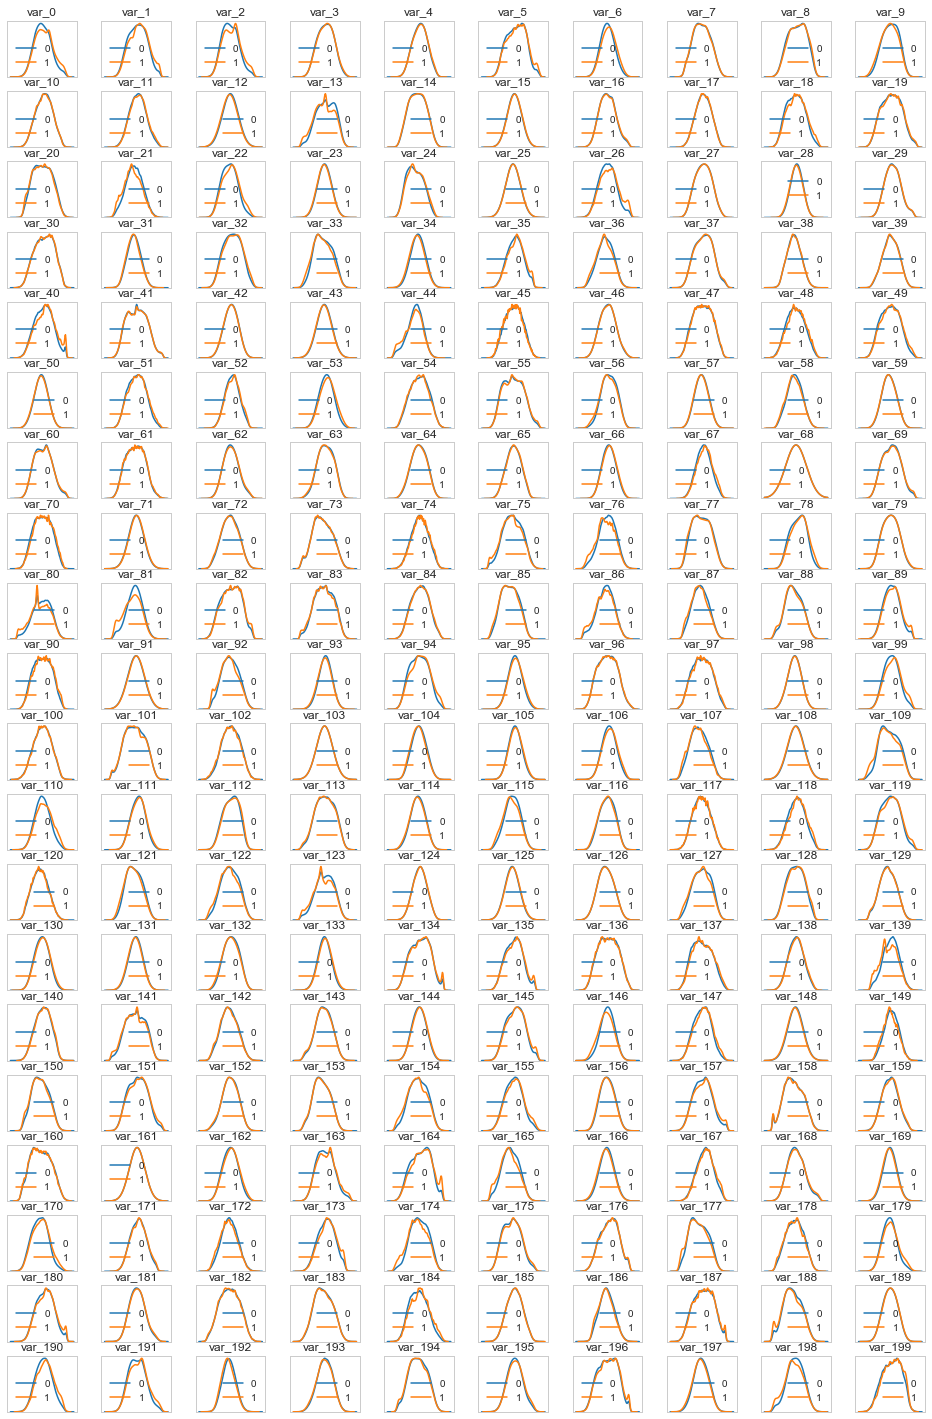

Wall time: 12.8 s


In [14]:
%%time
density_plot()

Top 10 duplicate values per feature in **train** dataset

In [91]:
%%time

columns_list = ['idx', 'feature', 'value', 'count']

top_duplicates = pd.DataFrame(columns=columns_list)

for idx, feature in enumerate(features_list):
    res= df[feature].value_counts().nlargest(1)
    _value, _count = res.index[0], res.values[0]

    top_duplicates = top_duplicates.append(pd.DataFrame([[idx, feature, _value, _count]],
                                                        columns=columns_list),
                                                        ignore_index=False)

top_duplicates = top_duplicates.set_index('idx')
top_duplicates = top_duplicates.sort_values('count', ascending=False).head(10)

Wall time: 4.12 s


In [92]:
top_duplicates.transpose()

idx,68,108,126,12,91,103,148,71,161,25
feature,var_68,var_108,var_126,var_12,var_91,var_103,var_148,var_71,var_161,var_25
value,5.0214,14.1999,11.5356,13.5545,6.9785,1.6662,4.0456,0.7031,5.7688,13.6723
count,1084,313,305,203,66,61,59,54,52,41


### Visualize data
Plot first 50 features

In [93]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis

In [157]:
%%time
scaler = MinMaxScaler(feature_range=(0, 255))
image_list = []
for i in range(50):
    image = np.array(df[features_list])[i][:196].reshape(14, 14)
    scaler.fit(image)
    image_list.append(scaler.transform(image))

Wall time: 19.6 s


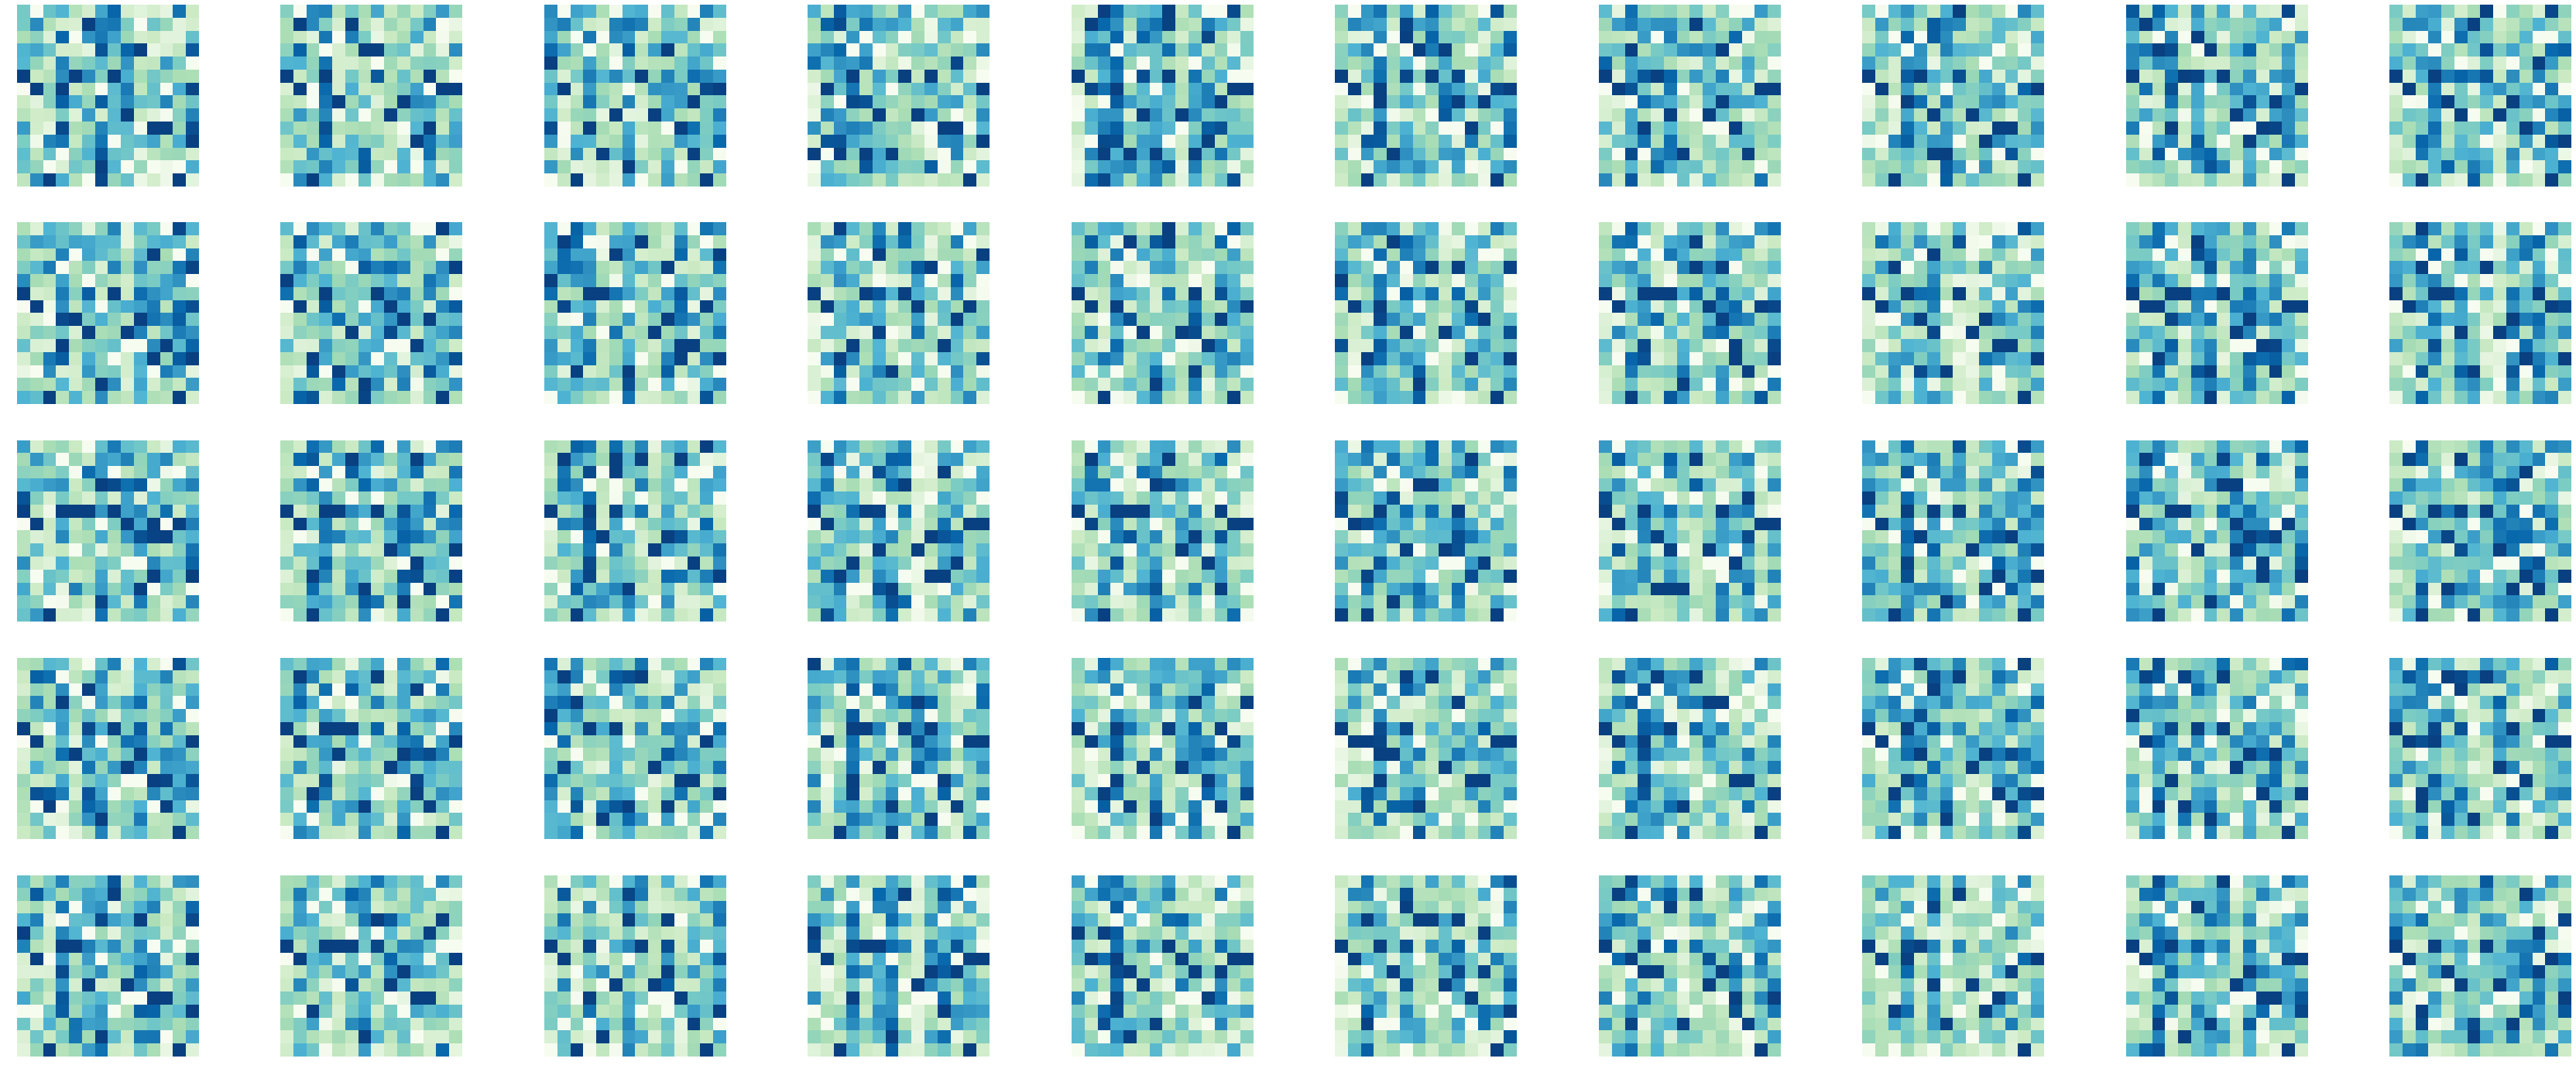

In [163]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(60, 25))

for i, image in enumerate(image_list):
    plt.subplot(5, 10, i+1)
    vmax = 255
    #plt.figure(1, figsize=(30, 30))
    plt.imshow(image, cmap='GnBu', vmin=0, vmax=vmax)
    plt.axis('off')
plt.show()

### Adversarial validation
Check the degree of similarity between train and test sets in terms of feature distribution.

We combine train and test data and quantify them by assigning 0 to train and 1 to test.

In [178]:
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.metrics import roc_auc_score

In [180]:
%%time
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

Wall time: 21.6 s


In [200]:
%%time
train_df = train_df[features_list]
train_df['istrain'] = 1

test_df = test_df[features_list]
test_df['istrain'] = 0

common_df = pd.concat([train_df, test_df], axis=0)
y = common_df['istrain']

common_df.drop('istrain', axis=1, inplace=True)

Wall time: 1.75 s


Split the new dataset using _xgboost_

In [198]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 15)
xgb_params = {
        'learning_rate': 0.05, 'max_depth': 4,'subsample': 0.9,
        'colsample_bytree': 0.9,'objective': 'binary:logistic',
        'silent': 1, 'n_estimators':100, 'gamma':1,
        'min_child_weight':4
        }   
clf = xgb.XGBClassifier(**xgb_params, seed = 10)

In [206]:
%%time
for train_idx, test_idx in skf.split(common_df, y):
    x0, x1 = common_df.iloc[train_idx], common_df.iloc[test_idx]
    y0, y1 = y.iloc[train_idx], y.iloc[test_idx]        
    print(x0.shape)
    clf.fit(x0, y0, eval_set=[(x1, y1)],
           eval_metric='logloss', verbose=False, early_stopping_rounds=10)

    prval = clf.predict_proba(x1)[:,1]
    print(roc_auc_score(y1,prval))

(320000, 200)
0.5075953646874999
(320000, 200)
0.51405954125
(320000, 200)
0.50329828625
(320000, 200)
0.5051856253125
(320000, 200)
0.5044508965625001


AUC score is almost 0.5 which means that it is not possible to distinguish between train and test datasets.